New Question Idea: What if we could predict whether a team was going to win a challenge? Possible features: challenge type: Immunity or Reward Number of Players on Team: Number of Players on opposing Team: % of women on team: Number of Challenges Previously Won: or Whether last challenge was won or lost: weather: Win or Loss: Average age of castaways on the team: type of challenge:

# Data Cleaning

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [198]:
castaways = pd.read_csv("castaways.csv")
challenges = pd.read_csv("challenges.csv")
viewers = pd.read_csv("viewers.csv")
gender = pd.read_csv("SurvivorPlayersCaunceTypes1636556879.csv")
ind_chall = pd.read_csv("ind_chall.csv")

newest_season_full = castaways[castaways.season == 41]
castaways = castaways[castaways.season != 41]

In [199]:
castaways['win'] = castaways.result.apply(lambda x: 1 if x == "Sole Survivor" else 0)
castaways.castaway_id = castaways.castaway_id.astype(object)
#castaways.win = castaways.win.astype(object)

In [200]:
gender['full_name'] = gender['First Name'] + " " + gender[' Last Name']
gender = gender[['full_name', ' Sex']]

In [201]:
castaways = castaways[['castaway_id','full_name', 'age', 'personality_type', 'state', 'win', 'season']]

In [202]:
#There are 6 people who are winners but have NaN gender, this code extracts those people and replaces the NaN with their gender
#all of these winners were male. 
cast2 = pd.merge(castaways, gender, how = 'left')

nogen = cast2[pd.isna(cast2[' Sex']) == True][cast2.win == 1]
nogen[' Sex'] = nogen[' Sex'].replace(np.nan, "M")
nogen = nogen[['full_name', ' Sex']]


<ipython-input-202-b9c1bf004e0e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nogen = cast2[pd.isna(cast2[' Sex']) == True][cast2.win == 1]


In [203]:
nogen

,full_name,Sex
402,Robert Crowley,M
421,James Thomas Jr.,M
520,Jud Birza,M
942,Nick Wilson,M
965,Chris Underwood,M
985,Tommy Sheehan,M


In [242]:
cast1 = pd.merge(cast2, nogen, on = 'full_name', how = 'outer')


In [205]:
cast1[' Sex'] = 0
for i in range(0, 1023):
    if pd.isna(cast1[' Sex_x'][i]) == True:
        cast1[' Sex'][i] = cast1[' Sex_y'][i]
    else:
        cast1[' Sex'][i] = cast1[' Sex_x'][i]

<ipython-input-205-d056c8a1506f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast1[' Sex'][i] = cast1[' Sex_x'][i]
C:\Users\bugrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-205-d056c8a1506f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast1[' Sex'][i] = cast1[' Sex_y'][i]


In [206]:
cast1 = cast1[['age', 'personality_type', 'state', ' Sex', 'win']]
cast1 = cast1.dropna()
cast = cast1.drop_duplicates()
newest_season_full[' Sex'] = ('M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M')
newest_season = newest_season_full[['age', 'personality_type', 'state', ' Sex']]

In [207]:
cast[cast.win == 1].reset_index()

,index,age,personality_type,state,Sex,win
0,30,39,ENTP,Rhode Island,M,1
1,71,25,ISFP,Pennsylvania,F,1
2,85,40,ESFJ,Tennessee,F,1
3,118,27,ISFP,Massachusetts,M,1
4,142,34,ESTJ,Florida,M,1
5,161,36,ISTJ,California,F,1
6,180,34,ISTP,California,M,1
7,199,21,ISTP,Pennsylvania,F,1
8,241,29,ESTP,Washington,F,1
9,244,35,ESTP,North Carolina,F,1


# Exploratory Data Analysis

In [213]:
percent_wins = cast.groupby(['personality_type', 'state', ' Sex']).mean().reset_index()
percent_wins.sort_values(by = 'win', axis = 0, ascending = False).head(20)

,personality_type,state,Sex,age,win
233,ISFJ,Arkansas,F,26.0,1.0
169,ESTP,Washington,F,29.0,1.0
223,INTP,Maine,M,57.0,1.0
69,ENTP,Ohio,M,33.0,1.0
9,ENFJ,New York,M,26.0,1.0
43,ENFP,Utah,M,22.0,1.0
181,INFJ,Texas,F,29.0,1.0
180,INFJ,Pennsylvania,M,34.0,0.5
103,ESFP,Idaho,M,35.0,0.5
72,ENTP,South Carolina,M,25.0,0.5


In [209]:
state_wins = cast[['win', 'state']].groupby(['state']).mean().reset_index()

<AxesSubplot:xlabel='win', ylabel='state'>

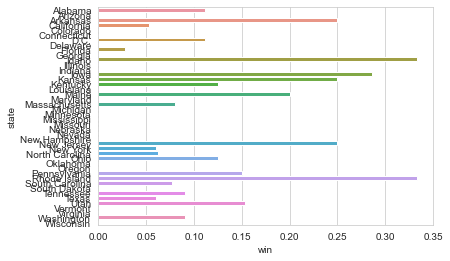

In [210]:
sns.barplot(x = 'win', y = 'state', data = state_wins)

<AxesSubplot:xlabel='win', ylabel='age'>

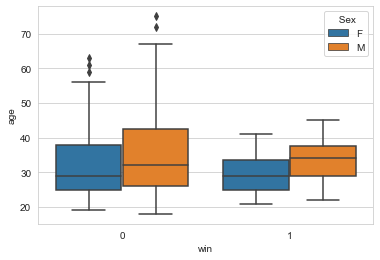

In [11]:
sns.boxplot(x = 'win', y = 'age', data = cast, hue = ' Sex')

<AxesSubplot:xlabel='win', ylabel='personality_type'>

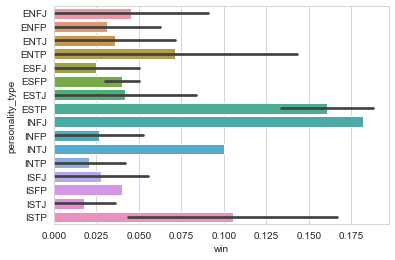

In [12]:
pers_sex_int = cast[['personality_type', ' Sex', 'win']].groupby(['personality_type', ' Sex']).mean().reset_index()
sns.barplot(x = 'win', y = 'personality_type', data = pers_sex_int)

<AxesSubplot:xlabel='personality_type', ylabel='win'>

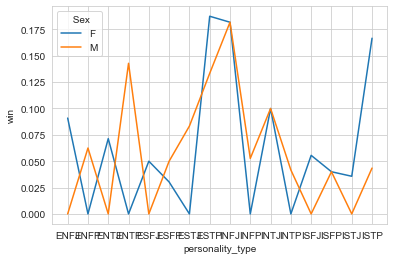

In [13]:
sns.lineplot(x = 'personality_type', y = 'win', data = pers_sex_int, hue = ' Sex')

# Modeling

In [214]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier     
from sklearn import tree, preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 

In [215]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
pers_encoded=le.fit_transform(cast['personality_type'])
state_encoded=le.fit_transform(cast['state'])
test_encoded=le.fit_transform(cast[' Sex'])

cast['personality_type'] = pers_encoded
cast['state'] = state_encoded
cast[' Sex'] = test_encoded
cast

<ipython-input-215-90fd6d95e05d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['personality_type'] = pers_encoded
<ipython-input-215-90fd6d95e05d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['state'] = state_encoded
<ipython-input-215-90fd6d95e05d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,age,personality_type,state,Sex,win
0,63,1,3,0,0
2,27,2,3,0,0
3,29,14,27,0,0
4,23,13,43,1,0
5,27,6,2,1,0
...,...,...,...,...,...
983,27,3,15,1,1
984,28,3,15,1,0
987,25,3,35,1,0
988,25,3,35,1,1


In [216]:
Y = cast.win
X = cast[['age', 'personality_type', 'state', ' Sex']]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=713, test_size=0.4)

In [218]:
nb = MultinomialNB()

In [219]:
def hw (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    y_prob_test = model.predict_proba(X_test)[:,1]
    y_prob_train = model.predict_proba(X_test)[:,1]
    train_accuracy = metrics.accuracy_score(y_train, y_hat_train)
    test_accuracy = metrics.accuracy_score(y_test, y_hat_test)
    f1_test = metrics.f1_score(y_test, y_hat_test)
    f1_train = metrics.f1_score(y_train, y_hat_train)
    auc_test = roc_auc_score(y_test, y_prob_test)
    auc_train = roc_auc_score(y_test, y_prob_train)
    total = {'accuracy': [train_accuracy,test_accuracy], 'F1':[f1_train, f1_test], 'AUC': [auc_train, auc_test] }
    df = pd.DataFrame.from_dict(total, orient = 'index', columns = ['train', 'test'])
    return [df, y_prob_test]

In [220]:
nb_res = hw(nb, X_train, y_train, X_test, y_test)
nb_res[0]

,train,test
accuracy,0.891117,0.918455
F1,0.050000,0.095238
AUC,0.609939,0.609939


In [221]:
lr = LogisticRegression(solver='liblinear', C=1)
lr_res = hw(lr, X_train, y_train, X_test, y_test)
lr_res[0]

,train,test
accuracy,0.928367,0.935622
F1,0.000000,0.000000
AUC,0.679358,0.679358


In [222]:
dc = DecisionTreeClassifier()
all_scores = []
tree_depth = np.arange(2,30)
for d in tree_depth:
    tree = DecisionTreeClassifier(max_depth=d) 
    scores = cross_val_score(tree,X_train,y_train, cv=10) 
    all_scores.append(scores.mean())
n_depth = tree_depth[np.argmax(all_scores)]
print(n_depth)

2


In [223]:
dc = DecisionTreeClassifier(max_depth = n_depth)
dc_res = hw(dc, X_train, y_train, X_test, y_test)
dc_res[0]

,train,test
accuracy,0.928367,0.935622
F1,0.000000,0.000000
AUC,0.633792,0.633792


In [234]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
rf_res = hw(rf, X_train, y_train, X_test, y_test)
rf_res[0]

,train,test
accuracy,0.928367,0.935622
F1,0.000000,0.000000
AUC,0.681804,0.681804


In [225]:
gb = GradientBoostingClassifier(n_estimators=75, learning_rate=.1)
gb_res = hw(gb, X_train, y_train, X_test, y_test)
gb_res[0]

,train,test
accuracy,0.951289,0.918455
F1,0.484848,0.000000
AUC,0.619725,0.619725


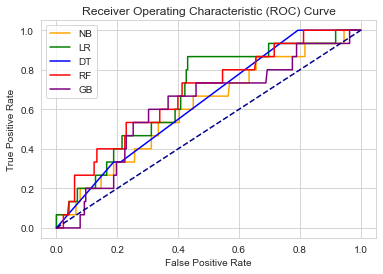

In [235]:
fpr, tpr, thresh = roc_curve(y_test, nb_res[1])
fpr_l, tpr_l, thresh_l = roc_curve(y_test, lr_res[1])
fpr_2, tpr_2, thresh_2 = roc_curve(y_test, dc_res[1])
fpr_3, tpr_3, thresh_3 = roc_curve(y_test, rf_res[1])
fpr_4, tpr_4, thresh_4 = roc_curve(y_test, gb_res[1])

plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_l, tpr_l, color='green', label='LR')
plt.plot(fpr_2, tpr_2, color='blue', label='DT')
plt.plot(fpr_3, tpr_3, color='red', label='RF')
plt.plot(fpr_4, tpr_4, color='purple', label='GB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Results

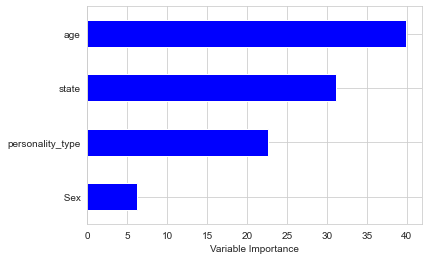

In [236]:
#Feature importances for the Random Forest Model
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X.columns)
Importance = Importance.iloc[rf.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [231]:
#feature importances for Logistic Regression
from sklearn.inspection import permutation_importance

imps = permutation_importance(lr, X, Y)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features = X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1.  Sex (0.000000)
2. state (0.000000)
3. personality_type (0.000000)
4. age (0.000000)


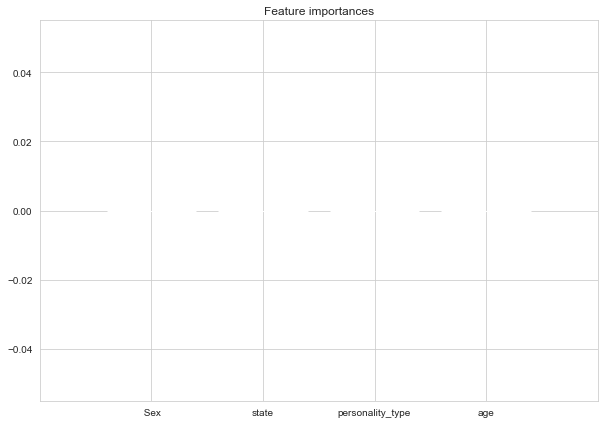

In [232]:
#Plot of feature importances for Logistic Regression
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features[indices[i]] for i in range(4)])
plt.xlim([-1, X.shape[1]])
plt.show()

# Prediction for Season 41

In [237]:
pers_encoded=le.fit_transform(newest_season['personality_type'])
state_encoded=le.fit_transform(newest_season['state'])
test_encoded=le.fit_transform(newest_season[' Sex'])

newest_season['personality_type'] = pers_encoded
newest_season['state'] = state_encoded
newest_season[' Sex'] = test_encoded

<ipython-input-237-56808021aed6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newest_season['personality_type'] = pers_encoded
<ipython-input-237-56808021aed6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newest_season['state'] = state_encoded
<ipython-input-237-56808021aed6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [238]:
season_41_preds = rf.predict(newest_season)
season_41_pred_prob = pd.DataFrame(rf.predict_proba(newest_season))
list(season_41_pred_prob.iloc[:, 1])

[0.07889610142441976,
 0.05030178546782107,
 0.07569570351299065,
 0.040788939526744145,
 0.06439794031660033,
 0.03240296977965836,
 0.049763637733110364,
 0.0167501734478323,
 0.1386012009080417,
 0.05773097986697232,
 0.06845368645342352,
 0.08654167585056768,
 0.07443144378604077,
 0.06696234198133018,
 0.023672125550507513,
 0.04108891832198101,
 0.07180153668368043,
 0.1297084108246028]

In [239]:
newest_season_full['prediction_probs'] = list(season_41_pred_prob.iloc[:, 1])
newest_season_full[['full_name', 'prediction_probs']]

,full_name,prediction_probs
744,Eric Abraham,0.078896
745,Sara Wilson,0.050302
746,David Voce,0.075696
747,Brad Reese,0.040789
748,Jairus Robinson,0.064398
749,Genie Chen,0.032403
750,Sydney Segal,0.049764
751,Tiffany Seely,0.016750
752,Naseer Muttalif,0.138601
753,Evvie Jagoda,0.057731


In [240]:
newest_season_full[['full_name', 'prediction_probs']][newest_season_full.prediction_probs == newest_season_full.prediction_probs.max()]

,full_name,prediction_probs
752,Naseer Muttalif,0.138601


In [241]:
#here I think I am trying to attach the prediction and prediciton probability of every player to the original dataframe, the castaways dataframe is the problem - different from cast1
castaways = castaways.dropna()
done = pd.DataFrame(rf.predict_proba(X))
cast1['predict'] = list(done.iloc[:,1])
cast1['pred'] = rf.predict(X)

ValueError: Length of values (582) does not match length of index (897)